In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

# Load dataset
df = pd.read_csv('../data/listings.csv')
df.shape

(86064, 18)

In [3]:
# Preview
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,100.0,2,4,2019-10-24,0.04,1,356,0,7511409139079
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,97.0,1,435,2025-02-16,2.28,1,114,45,7510402838018
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,129.0,10,373,2025-02-26,2.20,1,188,25,7510400829623
3,7964,Sunny apartment with balcony,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,NaN,7,5,2015-09-14,0.03,1,0,0,7510903576564
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75.0,180,0,NaN,NaN,1,358,0,"Available with a mobility lease only (""bail mo..."


In [4]:
# Info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86064 entries, 0 to 86063
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              86064 non-null  int64  
 1   name                            86064 non-null  object 
 2   host_id                         86064 non-null  int64  
 3   host_name                       86023 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   86064 non-null  object 
 6   latitude                        86064 non-null  float64
 7   longitude                       86064 non-null  float64
 8   room_type                       86064 non-null  object 
 9   price                           55655 non-null  float64
 10  minimum_nights                  86064 non-null  int64  
 11  number_of_reviews               86064 non-null  int64  
 12  last_review                     

In [5]:
# Null counts
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               86064
price                             30409
reviews_per_month                 21794
last_review                       21794
license                           18018
host_name                            41
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
name                                  0
minimum_nights                        0
number_of_reviews                     0
host_id                               0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
id                                    0
dtype: int64

In [6]:
# Clean 'price' column if it's a string with commas or $
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
# Optional: convert date columns
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
# Drop unnecessary columns (customize as needed)
drop_cols = ['neighbourhood_group', 'license', 'scrape_id', 'calendar_last_scraped']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

EDA

Text(0.5, 0, 'Price (€)')

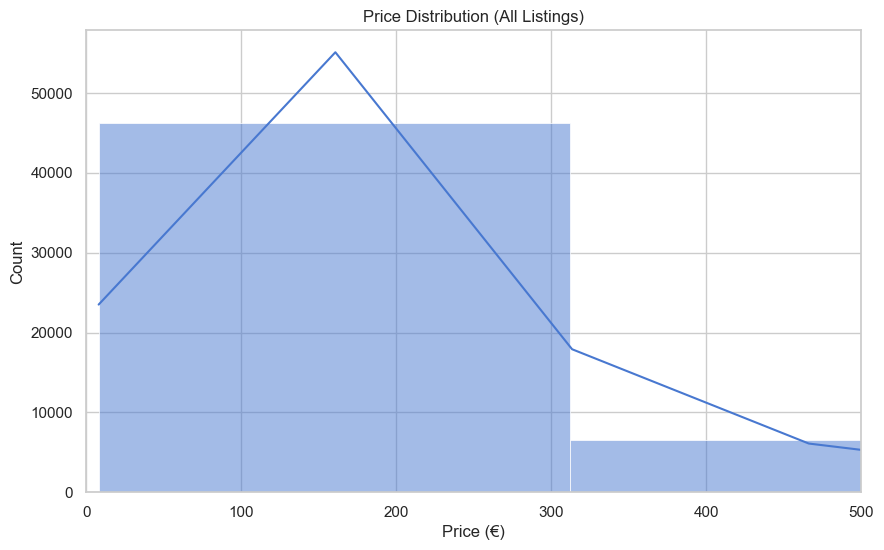

In [9]:
# Price distrobution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution (All Listings)')
plt.xlim(0, 500)  # Limit to reduce outliers
plt.xlabel('Price (€)')

Text(0.5, 0, 'Average Price (€)')

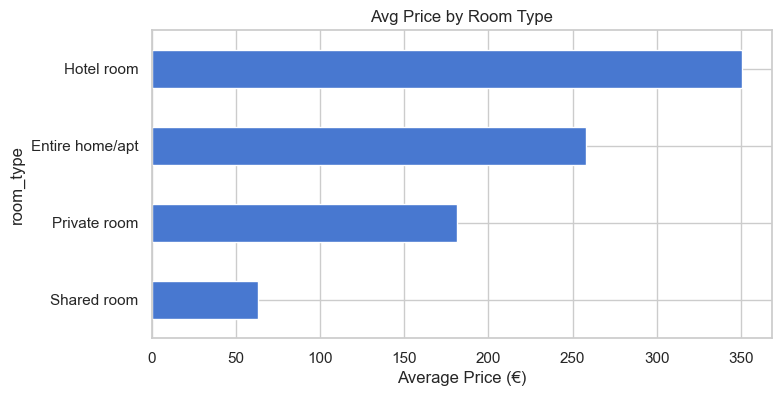

In [10]:
# Average Price by Room Type
room_price = df.groupby('room_type')['price'].mean().sort_values()
room_price.plot(kind='barh', figsize=(8, 4), title='Avg Price by Room Type')
plt.xlabel('Average Price (€)')

In [11]:
# Top 10 Expensive Listings
top10 = df.sort_values(by='price', ascending=False)[['name', 'neighbourhood', 'room_type', 'price']].head(10)
top10

,name,neighbourhood,room_type,price
60634,"Paris Centre Montorgeuil ,Pompidou,marais",Louvre,Entire home/apt,30400.0
6662,indisponible,Buttes-Chaumont,Entire home/apt,27000.0
12313,Mini Loft Parisien Roquette CityCosy,Popincourt,Entire home/apt,24200.0
59847,Appartement Jardin Seguin CityCosy,Buttes-Montmartre,Entire home/apt,24200.0
66526,Par246 - 3 bedroom apartment facing a garden,Vaugirard,Entire home/apt,24031.0
66428,Rue braque,Hôtel-de-Ville,Entire home/apt,20000.0
72582,Par096 - Luxury penthouse on Avenue Montaigne,Élysée,Entire home/apt,18403.0
44500,1BDR w balcon- Bail mobilité,Popincourt,Entire home/apt,15000.0
65171,Hôtel Particulier Trocadéro - Tour Eiffel Paris,Passy,Entire home/apt,14497.0
85887,Par007 - Unique penthouse on top of Palace,Élysée,Entire home/apt,14043.0


In [12]:
df.to_csv('../data/paris_airbnb_cleaned.csv', index=False)